In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset - Subway delay data set with outliers (Min Delay greater than 30) removed
df = pd.read_csv('Toronto-Subway-Delay-Jan-2014-Jun-2021 removed_above_30.csv')
df

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,1/1/2014,2:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001
1,1/1/2014,2:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0
2,1/1/2014,3:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116
3,1/1/2014,3:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386
4,1/1/2014,3:29,Wednesday,DUFFERIN STATION,MUPAA,0,0,E,BD,5174
...,...,...,...,...,...,...,...,...,...,...
143135,6/30/2021,1:23,Wednesday,ST CLAIR STATION,MUIS,0,0,NaN,YU,0
143136,6/30/2021,6:00,Wednesday,TORONTO TRANSIT COMMIS,MUO,0,0,NaN,SHP,0
143137,6/30/2021,12:40,Wednesday,LESLIE STATION,MUIS,0,0,NaN,SHP,0
143138,6/30/2021,20:50,Wednesday,LESLIE STATION,MUTD,9,14,E,SHP,6171


In [3]:
df.isna().sum()

Date             0
Time             0
Day              0
Station          0
Code             1
Min Delay        0
Min Gap          0
Bound        32209
Line           544
Vehicle          0
dtype: int64

<AxesSubplot:>

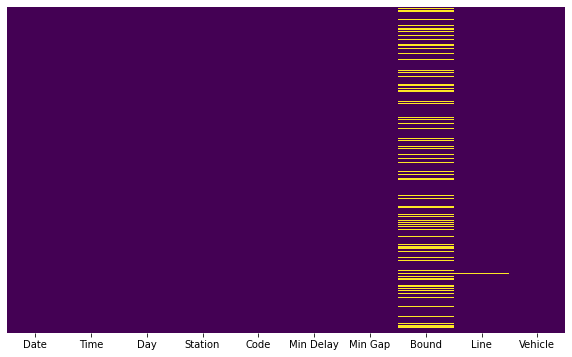

In [4]:
# Yellow lines in this heatmap show the NaN values in the dataset

plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [5]:
# drop the 'Bound' column that contains 22.5% NaN values

df = df.drop(['Bound'], axis=1)
df


,Date,Time,Day,Station,Code,Min Delay,Min Gap,Line,Vehicle
0,1/1/2014,2:06,Wednesday,HIGH PARK STATION,SUDP,3,7,BD,5001
1,1/1/2014,2:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,YU,0
2,1/1/2014,3:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,BD,5116
3,1/1/2014,3:20,Wednesday,BLOOR STATION,MUSAN,5,10,YU,5386
4,1/1/2014,3:29,Wednesday,DUFFERIN STATION,MUPAA,0,0,BD,5174
...,...,...,...,...,...,...,...,...,...
143135,6/30/2021,1:23,Wednesday,ST CLAIR STATION,MUIS,0,0,YU,0
143136,6/30/2021,6:00,Wednesday,TORONTO TRANSIT COMMIS,MUO,0,0,SHP,0
143137,6/30/2021,12:40,Wednesday,LESLIE STATION,MUIS,0,0,SHP,0
143138,6/30/2021,20:50,Wednesday,LESLIE STATION,MUTD,9,14,SHP,6171


In [6]:
df.shape

(143140, 9)

In [7]:
#drop remaining NaN columns

df = df.dropna()
df.shape

(142595, 9)

In [8]:
df.isna().sum()

Date         0
Time         0
Day          0
Station      0
Code         0
Min Delay    0
Min Gap      0
Line         0
Vehicle      0
dtype: int64

In [9]:
# Preprocessing - Label Encoder for categorical variables

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Date'] = label_encoder.fit_transform(df['Date'])
df['Time'] = label_encoder.fit_transform(df['Time'])
df['Day'] = label_encoder.fit_transform(df['Day'])
df['Station'] = label_encoder.fit_transform(df['Station'])
df['Code'] = label_encoder.fit_transform(df['Code'])
df['Line'] = label_encoder.fit_transform(df['Line'])
df.head()

C:\Users\SURFACE\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SURFACE\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\SURFACE\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Line,Vehicle
0,0,966,6,206,181,3,7,39,5001
1,0,1000,6,417,91,0,0,55,0
2,0,1030,6,296,181,3,8,39,5116
3,0,1040,6,27,101,5,10,55,5386
4,0,1049,6,106,95,0,0,39,5174


In [10]:
# Define X, y

X = df.drop(['Min Delay'], axis =1)
y = df['Min Delay']

In [11]:
X

,Date,Time,Day,Station,Code,Min Gap,Line,Vehicle
0,0,966,6,206,181,7,39,5001
1,0,1000,6,417,91,0,55,0
2,0,1030,6,296,181,8,39,5116
3,0,1040,6,27,101,10,55,5386
4,0,1049,6,106,95,0,39,5174
...,...,...,...,...,...,...,...,...
143135,2045,683,6,463,90,0,55,0
143136,2045,1199,6,516,93,0,51,0
143137,2045,220,6,317,90,0,51,0
143138,2045,770,6,317,103,14,51,6171


In [12]:
y

0         3
1         0
2         3
3         5
4         0
         ..
143135    0
143136    0
143137    0
143138    9
143139    5
Name: Min Delay, Length: 142595, dtype: int64

In [13]:
# define features columns and number of features for Feature Selection methods

feature_name = list(X.columns)
num_feats = 6

In [61]:
# Feature Selection - Pearson Correlation

cor_list = []
feature_name = X.columns.tolist()
# calculate the correlation with y for each feature
for i in X.columns.tolist():
    cor = np.corrcoef(X[i], y)[0,1]
    cor_list.append(cor)
    num_feats = 8
    
cor_list = [0if np.isnan(i) else i for i in cor_list]
cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
cor_support = [True if i in cor_feature else False for i in feature_name]
cor_feature,cor_support, cor_list
pd.DataFrame({"feature":cor_feature, 'cor_value': cor_list})

,feature,cor_value
0,Day,-0.013265
1,Time,-0.009801
2,Date,-0.005933
3,Station,-0.019198
4,Line,-0.032300
5,Code,0.943385
6,Vehicle,0.023633
7,Min Gap,0.246682


In [75]:
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)

In [76]:
# Feature Selection - Chi squared

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def chi_squared_selector(X, y, num_feats):
    chi_selector = SelectKBest(chi2, k=num_feats)
    chi_selector.fit(X_norm, y)
    chi_support = chi_selector.get_support()
    chi_feature = X.loc[:,chi_support].columns.tolist()
    return chi_support, chi_feature

In [77]:
chi_support, chi_feature = chi_squared_selector(X, y,num_feats)
print(str(len(chi_feature)), 'selected features')

6 selected features


In [78]:
# Feature Selection - Recursive Feature Elimination

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

def rfe_selector(X, y, num_feats):
    rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
    rfe_selector.fit(X, y)
    rfe_support = rfe_selector.get_support()
    rfe_feature = X.loc[:,rfe_support].columns.tolist()
    return rfe_support, rfe_feature

In [ ]:
rfe_support, rfe_feature = rfe_selector(X, y,num_feats)
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 8 features.


In [528]:
rfe_feature

['Date', 'Time', 'Station', 'Code', 'Min Gap', 'Line']

In [529]:
# Feature Selection - Embedded RandomForestClassifier


from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

def embedded_rf_selector(X, y, num_feats):
    embedded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
    embedded_rf_selector.fit(X, y)
    embedded_rf_support = embedded_rf_selector.get_support()
    embedded_rf_feature = X.loc[:,embedded_rf_support].columns.tolist()
    return embedded_rf_support, embedded_rf_feature

In [530]:
embedded_rf_support, embedded_rf_feature = embedded_rf_selector(X, y, num_feats)
print(str(len(embedded_rf_feature)), 'selected features')

1 selected features


In [531]:
embedded_rf_feature

['Min Gap']

In [ ]:
print(f' Chi-squared: {(chi_feature)}')
print(f' Recursive Feature Elimination: {(rfe_feature)}')
print(f' Embedded RandomForestClassifier: {(embedded_rf_feature)}')

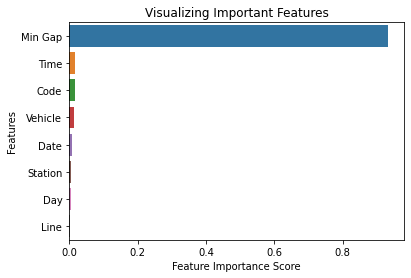

In [63]:
# Feature Score for RandomForestRegressor

rfr.fit(X_train, y_train)
#X_train = label_encoder.fit_transform(X_train)
#X_test = label_encoder.transform(X_test)

y_pred = rfr.predict(X_test)
feature_scores = pd.Series(rfr.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores


sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')

plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [73]:
# Define X for selected features from Feature Selection Methods

X = df[['Date', 'Time', 'Station', 'Min Gap', 'Code']]
X

,Date,Time,Station,Min Gap,Code
0,0,966,206,7,181
1,0,1000,417,0,91
2,0,1030,296,8,181
3,0,1040,27,10,101
4,0,1049,106,0,95
...,...,...,...,...,...
143135,2045,683,463,0,90
143136,2045,1199,516,0,93
143137,2045,220,317,0,90
143138,2045,770,317,14,103


In [15]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                    test_size = 0.25,
                                                  random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(106946, 5)
(35649, 5)
(106946,)
(35649,)


In [16]:
# Algorithm - Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_model = LinearRegression()

lin_model = lin_model.fit(X_train, y_train)
lin_model

lin_r2 = r2_score(y_test, lin_model.predict(X_test))
print(f' Linear Regression Test Accuracy: {(lin_r2)}')

 Linear Regression Test Accuracy: 0.8901907365208289


In [18]:
# Algorithm - Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, random_state =0, n_jobs=-1)
rfr.fit(X_train, y_train)
rfr

rfr_r2 = r2_score(y_test, rfr.predict(X_test))
print(f' Random Forest Regressor Test Accuracy: {(rfr_r2)}')

 Random Forest Regressor Test Accuracy: 0.9452888781323181


In [19]:
# Algorithm - Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)
dtr

dtr_r2 = r2_score(y_test, dtr.predict(X_test))
print(f' Decision Tree Regressor Test Accuracy: {(dtr_r2)}')

 Decision Tree Regressor Test Accuracy: 0.9083528731811269


In [20]:
# The highest accuracy was acheived by the Random Forest Regressor model with an r2 score of 94%

print(f' Linear Regression Test Accuracy: {(lin_r2)}')
print(f' Random Forest Regressor Test Accuracy: {(rfr_r2)}')
print(f' Decision Tree Regressor Test Accuracy: {(dtr_r2)}')

 Linear Regression Test Accuracy: 0.8901907365208289
 Random Forest Regressor Test Accuracy: 0.9452888781323181
 Decision Tree Regressor Test Accuracy: 0.9083528731811269


In [21]:
#YPred - RandomForestRegressor

y_pred = rfr.predict(X_test)
y_pred

array([0.  , 5.81, 0.  , ..., 0.  , 0.  , 0.  ])

In [22]:
# Actual and Predicted values from RandomForestRegressor model


result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result.iloc[:10,:]
result

,Actual,Predicted
53562,0,0.00
49795,7,5.81
87533,0,0.00
18979,4,4.24
57912,0,0.00
...,...,...
131295,4,3.91
69109,0,0.00
130243,0,0.00
33781,0,0.00


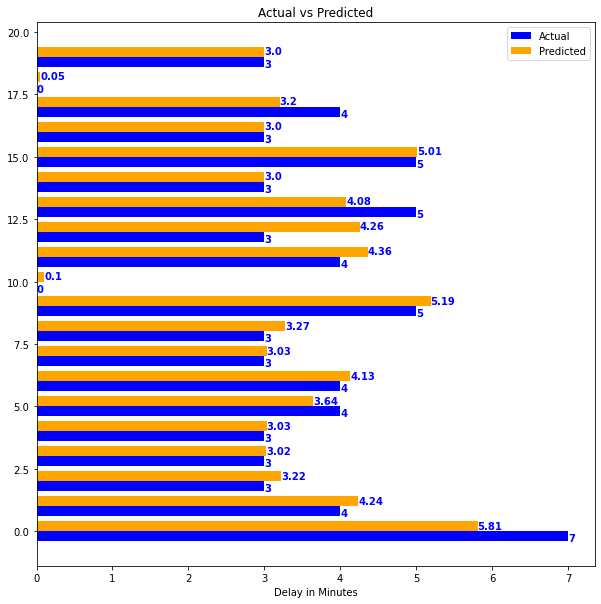

In [67]:
# Bar plot of actual and predicted values for Random Forest Regressor model

result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result = result[(result.T != 0).any()]
result


    
result.iloc[:10,:]


actual = result['Actual'][:20].tolist()
predicted = result['Predicted'][:20].tolist()
actual,predicted



plt.figure(figsize = (10, 10))

X_axis = np.arange(len(actual))
 

# fig, ax = plt.subplots()
plt.barh(X_axis -0.2, actual, 0.4, color="blue", label = 'Actual')
# plt.bar(X_axis - 0.2, actual, 0.4, label = 'Actual')
for i, v in enumerate(actual):
    plt.text(v, i-.4 , str(v), color='blue', fontweight='bold')
plt.barh(X_axis + 0.2, predicted, 0.4, label = 'Predicted', color = 'orange')
for j, s in enumerate(predicted):
    plt.text(s, j+.1, str(s), color='blue', fontweight='bold')

# plt.xticks(X_axis, X)
plt.xlabel("Delay in Minutes")
# plt.ylabel("in Minutes")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

In [74]:
# 30% test split for Best Random Forest Regressor hyperparameters

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                    test_size = 0.30,
                                                  random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(99816, 5)
(42779, 5)
(99816,)
(42779,)


In [48]:

rfr2 = RandomForestRegressor(random_state=0, n_jobs=-1)

In [49]:
param_grid = {'n_estimators': np.arange(100,500),
             'max_depth': np.arange(3,10),
             'min_samples_split': [2, 5, 10]}

In [52]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(rfr2, param_grid, n_iter=50, n_jobs=-1)

In [53]:
rfr_model = rscv.fit(X_train, y_train)

In [57]:
rfr_model.best_estimator_

RandomForestRegressor(max_depth=9, min_samples_split=10, n_estimators=437,
                      n_jobs=-1, random_state=0)

In [59]:
rfr_best = rfr_model.best_estimator_.fit(X_train, y_train)

In [78]:
rfrbest_r2 = r2_score(y_test, rfr_best.predict(X_test))
print(f' Best Random Forest Regressor Test Accuracy: {(rfrbest_r2)}')

 Best Random Forest Regressor Test Accuracy: 0.9486170215682657


In [75]:
rfr_best1 = RandomForestRegressor(max_depth=9, min_samples_split=10, n_estimators=850,
                      n_jobs=-1, random_state=0)

In [76]:
rfr_best1 = rfr_best1.fit(X_train, y_train)

In [77]:
rfr_best1_r2 = r2_score(y_test, rfr_best1.predict(X_test))
rfr_best1_r2

0.9473111024983318